<a href="https://colab.research.google.com/github/Parth-nXp/CNN_mini_projects/blob/main/double_stack_multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install torchinfo

In [20]:
import torch
from torchinfo import summary
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, TensorDataset
from torch.optim import Adam
import matplotlib.pyplot as plt


device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)


cuda


In [11]:
X_images = torch.randn(1000, 3, 32, 32)
y_labels = torch.randint(0, 10, (1000,))

dataset = TensorDataset(X_images, y_labels)
dataloader = DataLoader(dataset, batch_size =32, shuffle = True)

In [12]:
class my_model(nn.Module):
  def __init__(self):
    super(my_model, self).__init__()
    self.layer1 = nn.Conv2d(3,16, kernel_size = 3, padding = 1)
    self.relu = nn.ReLU()
    self.maxpool = nn.MaxPool2d(kernel_size = 2, stride = 2)
    self.layer2 = nn.Conv2d(16, 32, kernel_size = 3, padding = 1)
    self.flatten = nn.Flatten()
    self.linear1= nn.Linear(32 * 8 * 8, 128)
    self.linear2 = nn.Linear(128, 10)

  def forward(self, x):
    x = self.layer1(x)
    x = self.relu(x)
    x = self.maxpool(x)
    x = self.layer2(x)
    x = self.relu(x)
    x = self.maxpool(x)
    x = self.flatten(x)
    x = self.linear1(x)
    x = self.relu(x)
    x = self.linear2(x)
    return x

model = my_model().to(device)
summary(model, input_size = (1, 3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
my_model                                 [1, 10]                   --
├─Conv2d: 1-1                            [1, 16, 32, 32]           448
├─ReLU: 1-2                              [1, 16, 32, 32]           --
├─MaxPool2d: 1-3                         [1, 16, 16, 16]           --
├─Conv2d: 1-4                            [1, 32, 16, 16]           4,640
├─ReLU: 1-5                              [1, 32, 16, 16]           --
├─MaxPool2d: 1-6                         [1, 32, 8, 8]             --
├─Flatten: 1-7                           [1, 2048]                 --
├─Linear: 1-8                            [1, 128]                  262,272
├─ReLU: 1-9                              [1, 128]                  --
├─Linear: 1-10                           [1, 10]                   1,290
Total params: 268,650
Trainable params: 268,650
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 1.91
Input size (MB): 0.01
Forward/b

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr = 0.001)

In [18]:
total_loss_plot = []
epochs = 20

for epoch in range(epochs):
  total_loss = 0
  model.train()
  for images, labels in dataloader:
    images = images.to(device)
    labels = labels.to(device)

    prediction = model(images)
    batch_loss = criterion(prediction, labels)
    total_loss += batch_loss.item()

    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()


  total_loss_plot.append(total_loss/len(dataloader))
  print(f'Epoch: {epoch + 1}, Loss: {total_loss_plot[-1]}')
  print("="*25)

Epoch: 1, Loss: 2.293287120759487
Epoch: 2, Loss: 2.288593754172325
Epoch: 3, Loss: 2.2633798643946648
Epoch: 4, Loss: 2.2035253047943115
Epoch: 5, Loss: 2.104117389768362
Epoch: 6, Loss: 1.9350645765662193
Epoch: 7, Loss: 1.558530479669571
Epoch: 8, Loss: 1.1772768162190914
Epoch: 9, Loss: 0.8117306251078844
Epoch: 10, Loss: 0.4940781984478235
Epoch: 11, Loss: 0.30758217768743634
Epoch: 12, Loss: 0.18083700467832386
Epoch: 13, Loss: 0.09168765530921519
Epoch: 14, Loss: 0.058888287749141455
Epoch: 15, Loss: 0.03819565940648317
Epoch: 16, Loss: 0.027785514888819307
Epoch: 17, Loss: 0.022718014603015035
Epoch: 18, Loss: 0.017746544705005363
Epoch: 19, Loss: 0.014144627813948318
Epoch: 20, Loss: 0.012147293367888778


/tmp/ipython-input-4108361774.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


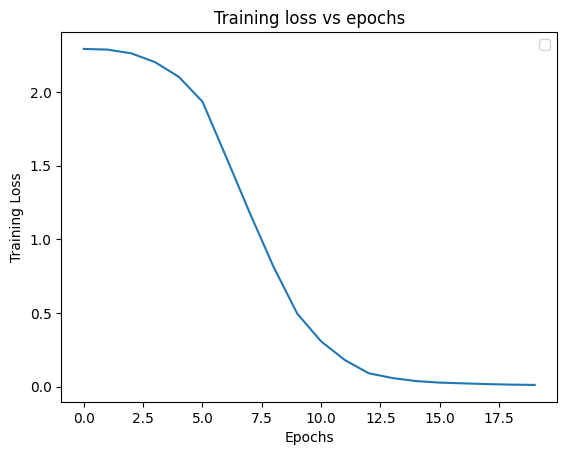

In [21]:
plt.plot(total_loss_plot)
plt.title("Training loss vs epochs")
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.legend()
plt.show()